<a href="https://colab.research.google.com/github/nehaaggarwal6871/Digit-Classification/blob/master/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import tensorflow as tf
import numpy as np
import pickle
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# print(model.summary())


In [2]:
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip gdrive/My\ Drive/ml_dataset/Image_captioning_Dataset.zip > /dev/null

In [5]:
img_path = '/content/Flicker8k_Dataset/101669240_b2d3e7f17b.jpg'

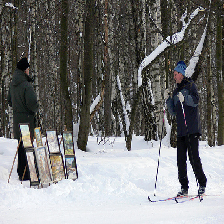

In [6]:
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
img

In [7]:
x = image.img_to_array(img)

In [8]:
x.shape
x = np.expand_dims(x, axis=0)

In [9]:
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)

49152/35363 [=========================================] - 0s 0us/step


In [10]:
print(p)

[[('n04228054', 'ski', 0.9903921), ('n04229816', 'ski_mask', 0.006187209), ('n03218198', 'dogsled', 0.0016573841), ('n09193705', 'alp', 0.000843442), ('n04208210', 'shovel', 0.0006139033)]]


In [24]:
path= '/content/gdrive/MyDrive/ml_dataset/set_0.pkl'

mydataset=pickle.load(open(path, 'rb'))
images=[]
captions=[]
for i,ex in enumerate(mydataset):
  details=ex.split('\t')
  images.append(details[0])
  captions.append(details[1])

print(len(images))  
print(images)
print(len(captions))
print(captions)





25000
['318667317_108c402140.jpg#4', '2072574835_febf0c5fb9.jpg#4', '3083016677_5782bc337c.jpg#4', '95734038_2ab5783da7.jpg#0', '241346146_f27759296d.jpg#1', '3182405529_7692256746.jpg#2', '3278777548_290b881018.jpg#1', '3621717946_d96f8a6012.jpg#3', '3542425197_2ef81c6051.jpg#1', '3384742888_85230c34d5.jpg#3', '514036362_5f2b9b7314.jpg#0', '3331797838_b3e33dbe17.jpg#3', '3372340429_91c4f4af30.jpg#2', '3634828052_3b6aeda7d6.jpg#0', '3186073578_6e115f45f5.jpg#1', '894928353_002a3d5f06.jpg#2', '2404520067_87798dbaee.jpg#3', '1383840121_c092110917.jpg#4', '3411393875_a9ff73c67a.jpg#2', '247652942_29ede19352.jpg#3', '3154152744_4e93ec8a62.jpg#1', '241347460_81d5d62bf6.jpg#0', '3547600292_6f8aac7f2e.jpg#4', '443885436_6e927e6c58.jpg#0', '2926595608_69b22be8d4.jpg#1', '3410899419_4f8dca6f3f.jpg#4', '3194134352_bc1b2a25d7.jpg#4', '3621649810_cca783b777.jpg#2', '2887103049_a867e74358.jpg#1', '3399284917_721aefe2a7.jpg#0', '2988439935_7cea05bc48.jpg#4', '973827791_467d83986e.jpg#1', '2921094201

AttributeError: ignored

In [43]:

BATCH_SIZE = 100
IMG_SHAPE  = 150 

model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

